# Hong Kong Weather & Pollution: Exploratory Data Analysis
  
**The Data Science Method**  


0.   Problem Identification 

1.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
2.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

3.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
4.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

5.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Load Required Python Packages

In [2]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<b>Locate and print current working directory.</b>

In [3]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution


<b>Get parent directory and append path to processed data.</b>

In [4]:
# Create raw data path by getting parent directory of current working directory and appending data/processed
parent_path = os.path.dirname(path)
data_path = os.path.join(parent_path, 'data', 'interim')
print(data_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/interim


In [5]:
os.listdir(data_path)

['monthly_pollution_2014_2020.csv',
 'daily_max_pollution.csv',
 'hourly_pollution.csv',
 '.gitkeep',
 'pollution_monthly_min_2014_2020.csv',
 'pollution_monthly_max_2014_2020.csv',
 'joined_weather_pollution_all_districts.csv',
 'cleaned_weather_2014_2020.csv']

## Load Weather & Pollution Data into DataFrame

In [6]:
df = pd.read_csv(data_path+'/joined_weather_pollution_all_districts.csv')

In [7]:
df.columns

Index(['Unnamed: 0', 'Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')

In [8]:
df['Date Period'] = pd.PeriodIndex(df['Unnamed: 0'], freq='M')
df = df[['Date Period','Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok']]
df.head()

,Date Period,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),...,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
0,2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,...,5.181452,5.119624,5.233871,5.362903,5.282258,4.696237,4.931452,6.310484,6.110215,5.631720
1,2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,...,3.511905,3.474702,3.403274,3.407738,3.558036,3.437500,3.312500,4.379464,4.346726,4.049107
2,2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,...,3.897849,3.901882,3.767473,3.719086,3.744624,3.721774,3.716398,5.024194,4.790323,4.494624
3,2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,...,4.166667,4.075000,3.943056,3.919444,3.751389,3.820833,3.912500,4.962500,4.919444,4.898611
4,2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,...,3.068548,2.803763,2.782258,2.646505,2.631720,2.775538,2.837366,3.750000,3.473118,3.483871


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype    
---  ------                               --------------  -----    
 0   Date Period                          84 non-null     period[M]
 1   Mean Pressure (hPa)                  84 non-null     float64  
 2   Mean Daily Max Air Temp (C°)         84 non-null     float64  
 3   Mean Air Temp (C°)                   84 non-null     float64  
 4   Mean Daily Min Air Temp (C°)         84 non-null     float64  
 5   Mean Dew Point (C°)                  84 non-null     float64  
 6   Mean Relative Humidity (%)           84 non-null     int64    
 7   Mean Amount of Cloud Coverage (%)    84 non-null     int64    
 8   Total Rainfall (mm)                  84 non-null     float64  
 9   Prevailing Wind Direction (degrees)  84 non-null     int64    
 10  Mean Wind Speed (km/h)               84 non-null     float64  
 11  Central/

## Column Names

In [10]:
df.columns

Index(['Date Period', 'Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Pressure (hPa),84.0,1013.035714,5.785079,1001.900000,1007.675000,1013.750000,1017.700000,1022.200000
Mean Daily Max Air Temp (C°),84.0,26.576190,4.900323,17.800000,21.775000,27.200000,31.325000,33.300000
Mean Air Temp (C°),84.0,23.978571,4.748952,15.500000,19.275000,25.000000,28.625000,30.200000
Mean Daily Min Air Temp (C°),84.0,22.097619,4.716773,13.400000,17.525000,23.150000,26.725000,28.300000
Mean Dew Point (C°),84.0,19.814286,5.112473,9.900000,15.475000,20.200000,25.000000,25.900000
Mean Relative Humidity (%),84.0,78.404762,5.146338,66.000000,76.000000,79.000000,82.250000,89.000000
Mean Amount of Cloud Coverage (%),84.0,69.392857,10.379565,32.000000,64.750000,70.500000,77.000000,84.000000
Total Rainfall (mm),84.0,203.200000,200.852787,1.000000,37.625000,136.500000,342.675000,708.800000
Prevailing Wind Direction (degrees),84.0,112.261905,81.364140,20.000000,60.000000,70.000000,210.000000,360.000000
Mean Wind Speed (km/h),84.0,22.954762,4.126155,12.800000,20.100000,22.850000,26.100000,37.100000


## Create DataFrame for AQHI in Causeway Bay
This will be used for prediction. I selected Causeway Bay AQHI as the dependent variable due to the fact that CWB has been rated by both [backpackers](link:https://www.thebrokebackpacker.com/where-to-stay-in-hong-kong/) and [others](link:https://misstourist.com/where-to-stay-in-hong-kong-best-hotels/) as the best location for families to stay. Since children and elderly are [most at risk for pollution related issues](link:https://www.health.nsw.gov.au/environment/air/Pages/who-is-affected.aspx), it is the most relevant AQHI to this study.

In [12]:
cwb_df = df[['Date Period','Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)','Causeway Bay']]
cwb_df.columns = ['Date Period','Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)','Causeway Bay Monthly Avg AQHI']
cwb_df.head()

,Date Period,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h),Causeway Bay Monthly Avg AQHI
0,2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,22.9,6.310484
1,2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6,4.379464
2,2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1,5.024194
3,2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,20.6,4.962500
4,2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,23.7,3.750000


### Map Pollution Rating to Health Risk Categories

In [13]:
aqhi_mapper = {1.0:'Low',
               2.0:'Low',
               3.0:'Low',
               4.0:'Moderate',
               5.0:'Moderate',
               6.0:'Moderate',
               7.0:'High',
               8.0:'Very High',
               9.0:'Very High',
               10.0:'Very High',
               11.0:'Serious'}

cwb_df['Causeway Bay AQHI Rating']= round(cwb_df['Causeway Bay Monthly Avg AQHI']).map(aqhi_mapper)


<ipython-input-13-b87e50714e28>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cwb_df['Causeway Bay AQHI Rating']= round(cwb_df['Causeway Bay Monthly Avg AQHI']).map(aqhi_mapper)


In [14]:
cwb_df.head()

,Date Period,Mean Pressure (hPa),Mean Daily Max Air Temp (C°),Mean Air Temp (C°),Mean Daily Min Air Temp (C°),Mean Dew Point (C°),Mean Relative Humidity (%),Mean Amount of Cloud Coverage (%),Total Rainfall (mm),Prevailing Wind Direction (degrees),Mean Wind Speed (km/h),Causeway Bay Monthly Avg AQHI,Causeway Bay AQHI Rating
0,2014-01,1021.3,19.2,16.3,14.1,9.9,67,32,1.0,40,22.9,6.310484,Moderate
1,2014-02,1017.7,17.9,15.5,13.5,12.3,82,73,39.5,50,26.6,4.379464,Moderate
2,2014-03,1017.1,20.9,18.7,17.0,15.7,83,77,207.6,60,24.1,5.024194,Moderate
3,2014-04,1013.4,24.9,22.6,21.0,20.0,86,72,132.4,80,20.6,4.962500,Moderate
4,2014-05,1009.5,28.6,26.4,24.6,23.7,86,82,687.3,240,23.7,3.750000,Moderate


<AxesSubplot:>

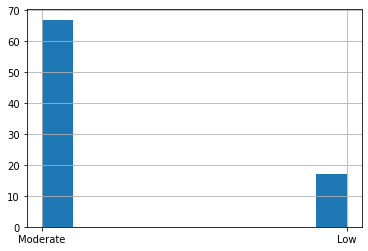

In [15]:
cwb_df['Causeway Bay AQHI Rating'].hist()

<AxesSubplot:>

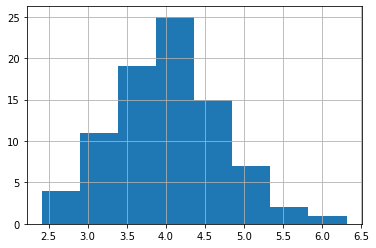

In [16]:
cwb_df['Causeway Bay Monthly Avg AQHI'].hist(bins=8)

### Examine Pollution Summary Statistics

In [17]:
cwb_df.shape

(84, 13)

In [18]:
cwb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype    
---  ------                               --------------  -----    
 0   Date Period                          84 non-null     period[M]
 1   Mean Pressure (hPa)                  84 non-null     float64  
 2   Mean Daily Max Air Temp (C°)         84 non-null     float64  
 3   Mean Air Temp (C°)                   84 non-null     float64  
 4   Mean Daily Min Air Temp (C°)         84 non-null     float64  
 5   Mean Dew Point (C°)                  84 non-null     float64  
 6   Mean Relative Humidity (%)           84 non-null     int64    
 7   Mean Amount of Cloud Coverage (%)    84 non-null     int64    
 8   Total Rainfall (mm)                  84 non-null     float64  
 9   Prevailing Wind Direction (degrees)  84 non-null     int64    
 10  Mean Wind Speed (km/h)               84 non-null     float64  
 11  Causeway

## Build data profile tables and plots

In [19]:
cwb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean Pressure (hPa),84.0,1013.035714,5.785079,1001.900000,1007.675000,1013.750000,1017.700000,1022.200000
Mean Daily Max Air Temp (C°),84.0,26.576190,4.900323,17.800000,21.775000,27.200000,31.325000,33.300000
Mean Air Temp (C°),84.0,23.978571,4.748952,15.500000,19.275000,25.000000,28.625000,30.200000
Mean Daily Min Air Temp (C°),84.0,22.097619,4.716773,13.400000,17.525000,23.150000,26.725000,28.300000
Mean Dew Point (C°),84.0,19.814286,5.112473,9.900000,15.475000,20.200000,25.000000,25.900000
Mean Relative Humidity (%),84.0,78.404762,5.146338,66.000000,76.000000,79.000000,82.250000,89.000000
Mean Amount of Cloud Coverage (%),84.0,69.392857,10.379565,32.000000,64.750000,70.500000,77.000000,84.000000
Total Rainfall (mm),84.0,203.200000,200.852787,1.000000,37.625000,136.500000,342.675000,708.800000
Prevailing Wind Direction (degrees),84.0,112.261905,81.364140,20.000000,60.000000,70.000000,210.000000,360.000000
Mean Wind Speed (km/h),84.0,22.954762,4.126155,12.800000,20.100000,22.850000,26.100000,37.100000


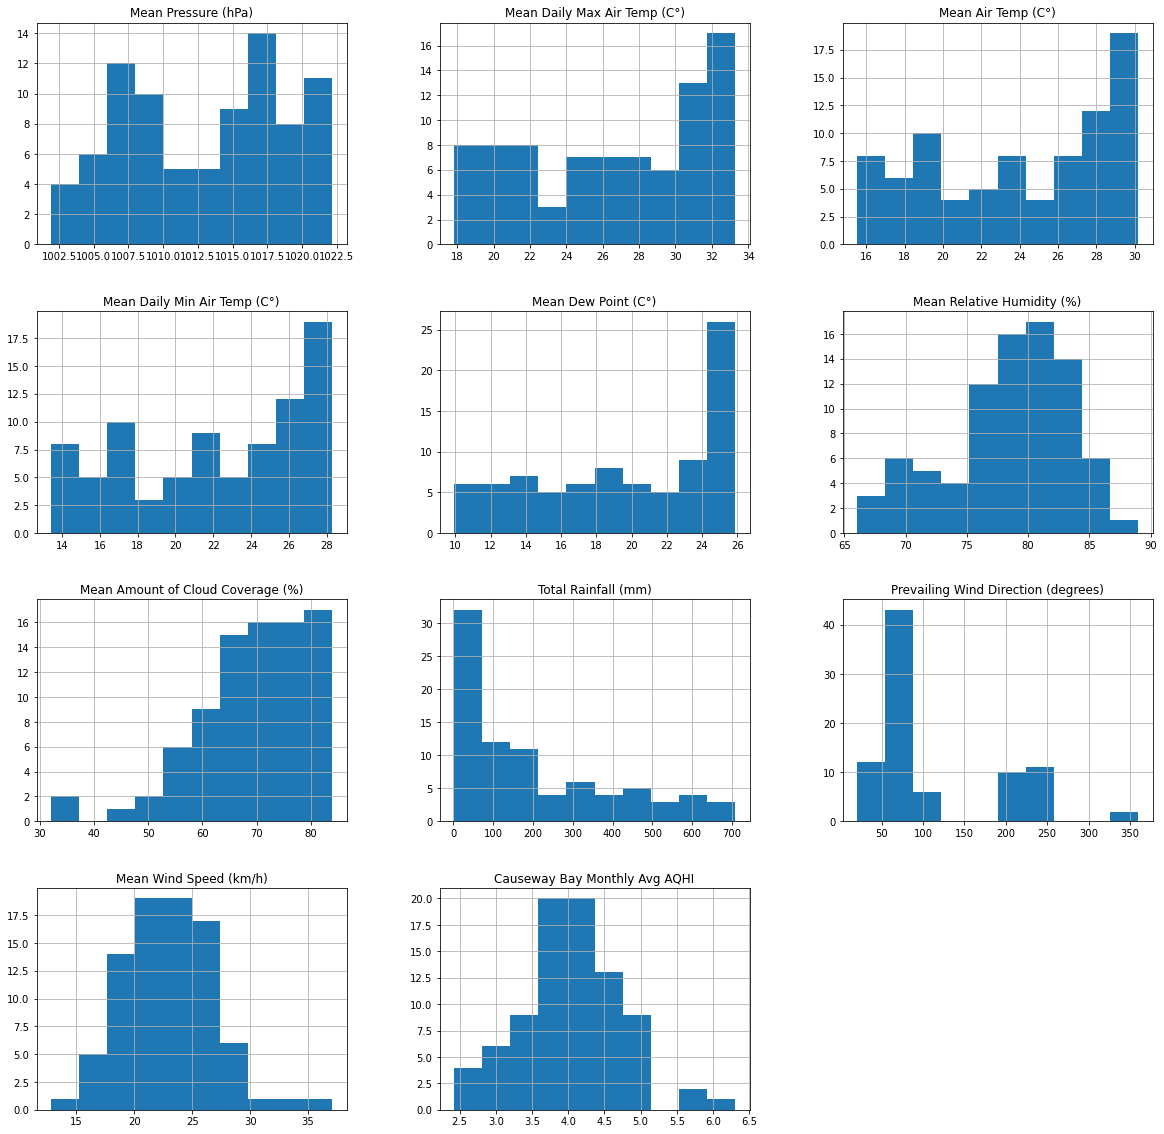

In [20]:
hist = cwb_df.hist(figsize=(20,20))

Look for similarities in the features that may indicate that they are duplicates or highly coorelated features. Make note of any interesting insights or findings.

- Look further into mean amount of cloud coverage and mean relative humidity (possible correlation)
- Mean wind speed and Monthly Avg AQHI have a similar distribution.

## Anamolies & Outliers

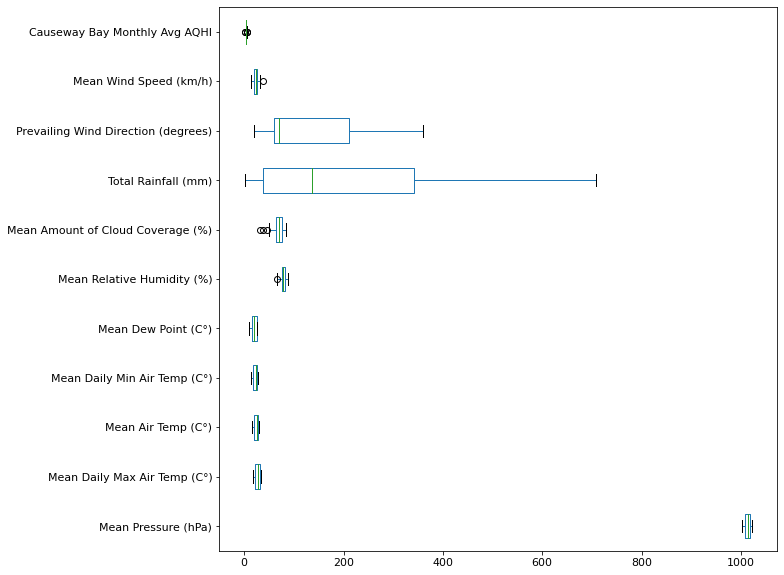

In [21]:
boxplot = cwb_df.boxplot(grid=False, vert=False, fontsize=11, figsize=(10,10))

Text(0.5, 0, 'Date')

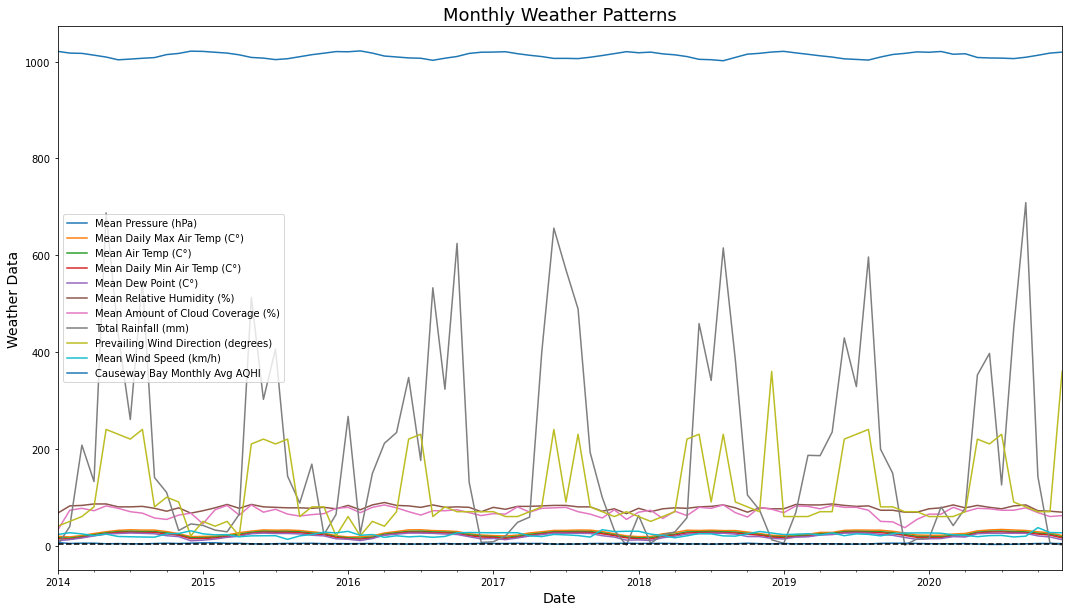

In [22]:
fig = cwb_df.plot(x='Date Period',figsize=(18,10)).get_figure()
plt.title('Monthly Weather Patterns', size=18)
plt.axhline(y=3.5, color='black', linestyle='--')
plt.ylabel('Weather Data', size=14)
plt.xlabel('Date', size=14)

#fig.savefig(parent+'/visualizations/Average_monthly_aqhi_timeseries_all_districts.jpg')


In [23]:
df.columns

Index(['Date Period', 'Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')

Text(0.5, 0, 'Date')

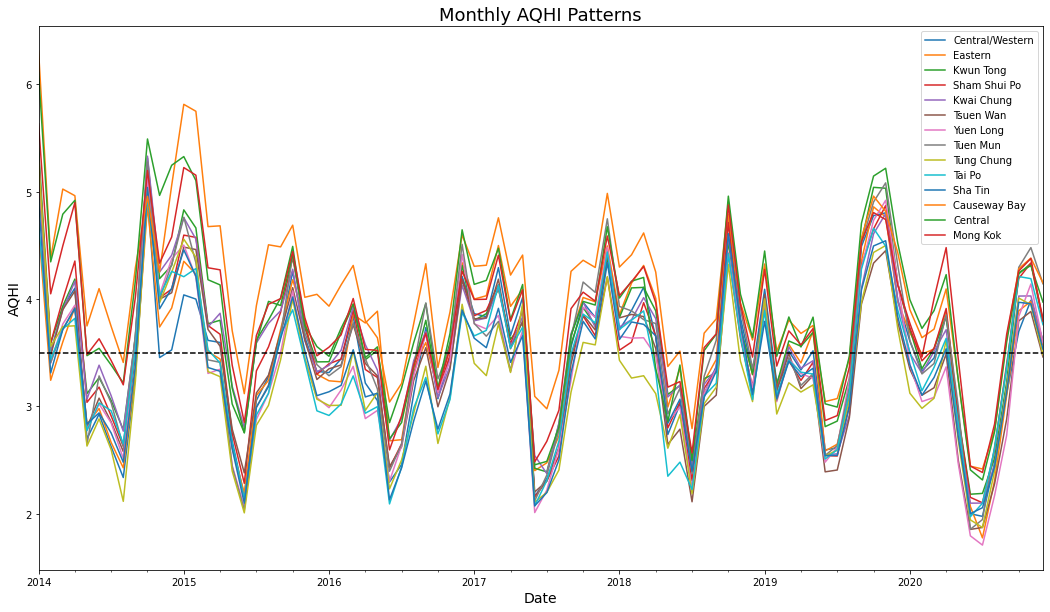

In [24]:
cities_aqhi = df[['Date Period','Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok']]

fig = cities_aqhi.plot(x='Date Period',figsize=(18,10)).get_figure()
plt.title('Monthly AQHI Patterns', size=18)
plt.axhline(y=3.5, color='black', linestyle='--')
plt.ylabel('AQHI', size=14)
plt.xlabel('Date', size=14)

The dashed line in the graph represents the boundary between 'low' and 'moderate' risk on the AQHI scale. As can be seen in the graph, the summer months have a seasonal drop in AQHI level. This suggests that summertime is a better time to visit for individuals who suffer from pollution irritated respiratory issues.

In [25]:
cities_aqhi.index = cities_aqhi['Date Period']
cities_aqhi.drop('Date Period',axis=1).T.mean()

Date Period
2014-01    5.310772
2014-02    3.628401
2014-03    4.016513
2014-04    4.209722
2014-05    2.996160
             ...   
2020-08    2.518241
2020-09    3.255357
2020-10    4.068260
2020-11    4.166766
2020-12    3.734255
Freq: M, Length: 84, dtype: float64

Text(0.5, 0, 'Date')

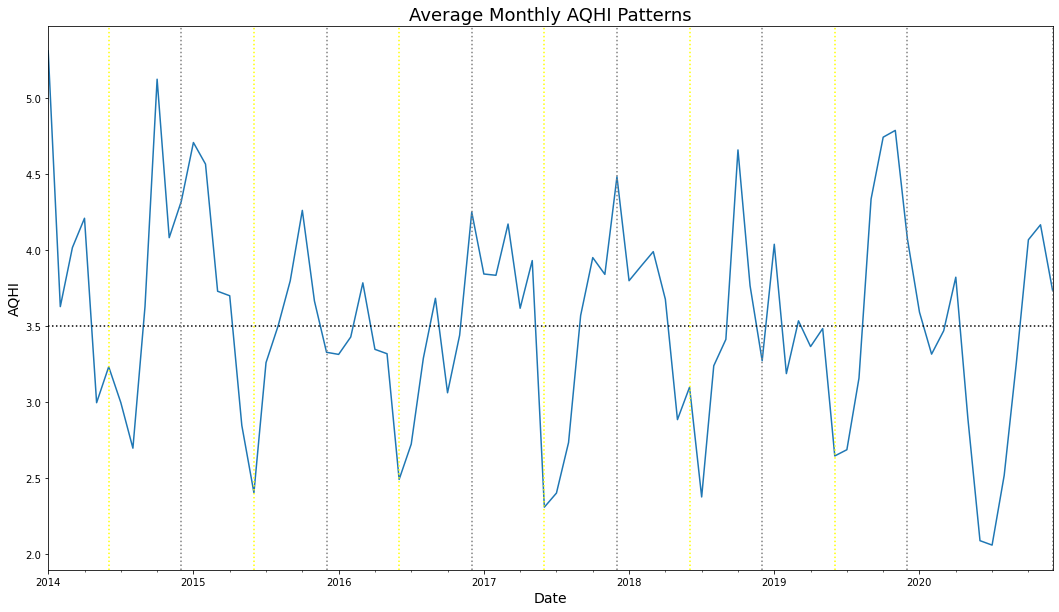

In [26]:
fig = cities_aqhi.drop('Date Period',axis=1).T.mean().plot(x=cities_aqhi['Date Period'],figsize=(18,10)).get_figure()

plt.title('Average Monthly AQHI Patterns', size=18)

# Horizontal line indicating boundary between low and moderate risk
plt.axhline(y=3.5, color='black', linestyle=':')

# Vertical lines indicating start of year and middle of year
plt.axvline(x='2014-12', color='gray',linestyle=':')
plt.axvline(x='2015-12', color='gray',linestyle=':')
plt.axvline(x='2016-12', color='gray',linestyle=':')
plt.axvline(x='2017-12', color='gray',linestyle=':')
plt.axvline(x='2018-12', color='gray',linestyle=':')
plt.axvline(x='2019-12', color='gray',linestyle=':')
plt.axvline(x='2020-12', color='gray',linestyle=':')

plt.axvline(x='2014-06', color='yellow',linestyle=':')
plt.axvline(x='2015-06', color='yellow',linestyle=':')
plt.axvline(x='2016-06', color='yellow',linestyle=':')
plt.axvline(x='2017-06', color='yellow',linestyle=':')
plt.axvline(x='2018-06', color='yellow',linestyle=':')
plt.axvline(x='2019-06', color='yellow',linestyle=':')

plt.ylabel('AQHI', size=14)
plt.xlabel('Date', size=14)

In [27]:
df.columns

Index(['Date Period', 'Mean Pressure (hPa)', 'Mean Daily Max Air Temp (C°)',
       'Mean Air Temp (C°)', 'Mean Daily Min Air Temp (C°)',
       'Mean Dew Point (C°)', 'Mean Relative Humidity (%)',
       'Mean Amount of Cloud Coverage (%)', 'Total Rainfall (mm)',
       'Prevailing Wind Direction (degrees)', 'Mean Wind Speed (km/h)',
       'Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'],
      dtype='object')

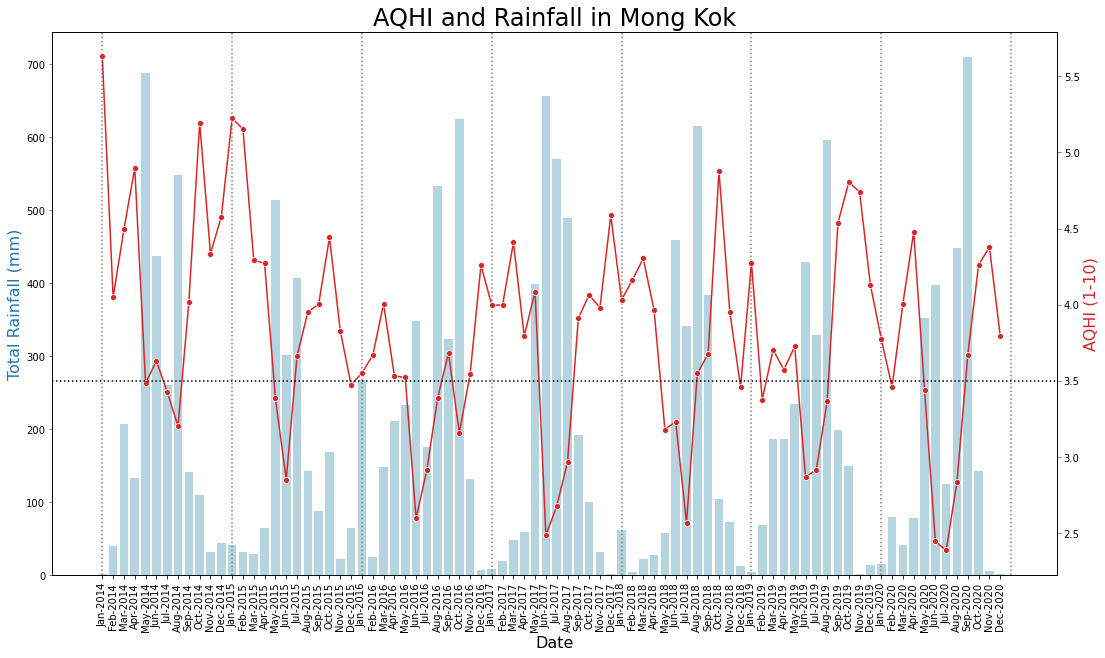

In [28]:
fig, ax1 = plt.subplots(figsize=(18,10))
color = 'tab:blue'
ax1.set_title('AQHI and Rainfall in Mong Kok', fontsize=24)

ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 = sns.barplot(x=df.index, y='Total Rainfall (mm)', data = df, color='lightblue')
ax1.tick_params(axis='y',color=color)
plt.xticks(np.arange(0,84), df['Date Period'],rotation=90)
plt.xticks(np.arange(0,84), df['Date Period'].dt.strftime('%b-%Y'),rotation=90)

# Vertical lines indicating start of year
plt.axvline(x=0, color='gray',linestyle=':')
plt.axvline(x=12, color='gray',linestyle=':')
plt.axvline(x=24, color='gray',linestyle=':')
plt.axvline(x=36, color='gray',linestyle=':')
plt.axvline(x=48, color='gray',linestyle=':')
plt.axvline(x=60, color='gray',linestyle=':')
plt.axvline(x=72, color='gray',linestyle=':')
plt.axvline(x=84, color='gray',linestyle=':')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AQHI (1-10)', fontsize=16, color=color)
ax2 = sns.lineplot(x=df.index, y='Mong Kok', data = df, sort=False, color=color,marker='o')
ax2.tick_params(axis='y', color=color)
plt.axhline(y=3.5, color='black',linestyle=':')


plt.show()

In [29]:
a = df.groupby(df['Date Period'].dt.strftime('%m'))[['Total Rainfall (mm)']].mean()
b = df.groupby(df['Date Period'].dt.strftime('%m'))[['Mean Air Temp (C°)']].mean()
c = df.groupby(df['Date Period'].dt.strftime('%m'))[['Central']].mean()

pd.concat([a,b,c],axis=1)

,Total Rainfall (mm),Mean Air Temp (C°),Central
Date Period,,,
01,57.014286,17.142857,4.499040
02,38.457143,17.157143,4.102055
03,97.600000,19.785714,4.189516
04,108.400000,23.342857,3.921429
05,353.971429,26.842857,3.467934
06,432.457143,29.157143,2.896230
07,315.371429,29.457143,2.876152
08,481.885714,28.942857,3.304916
09,290.714286,28.485714,3.936508


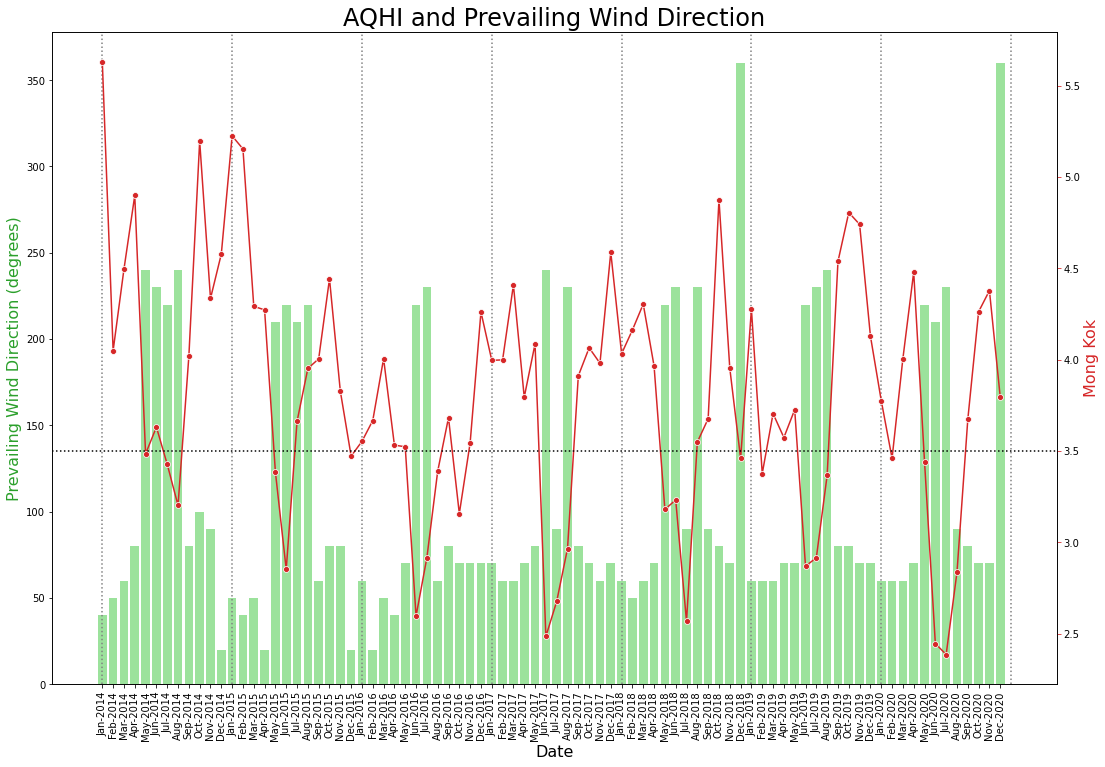

In [30]:
fig, ax1 = plt.subplots(figsize=(18,12))
color = 'tab:green'
ax1.set_title('AQHI and Prevailing Wind Direction', fontsize=24)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Prevailing Wind Direction', fontsize=16, color=color)
ax2 = sns.barplot(x=df.index, y='Prevailing Wind Direction (degrees)', data = df, color='lightgreen')
ax1.tick_params(axis='y')
plt.xticks(np.arange(0,84), df['Date Period'].dt.strftime('%b-%Y'),rotation=90)

# Vertical lines indicating start of year
plt.axvline(x=0, color='gray',linestyle=':')
plt.axvline(x=12, color='gray',linestyle=':')
plt.axvline(x=24, color='gray',linestyle=':')
plt.axvline(x=36, color='gray',linestyle=':')
plt.axvline(x=48, color='gray',linestyle=':')
plt.axvline(x=60, color='gray',linestyle=':')
plt.axvline(x=72, color='gray',linestyle=':')
plt.axvline(x=84, color='gray',linestyle=':')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Mong Kok', fontsize=16, color=color)
ax2 = sns.lineplot(x=df.index, y='Mong Kok', data = df, sort=False, color=color,marker='o')
ax2.tick_params(axis='y', color=color)
plt.axhline(y=3.5, color='black',linestyle=':')

plt.show()

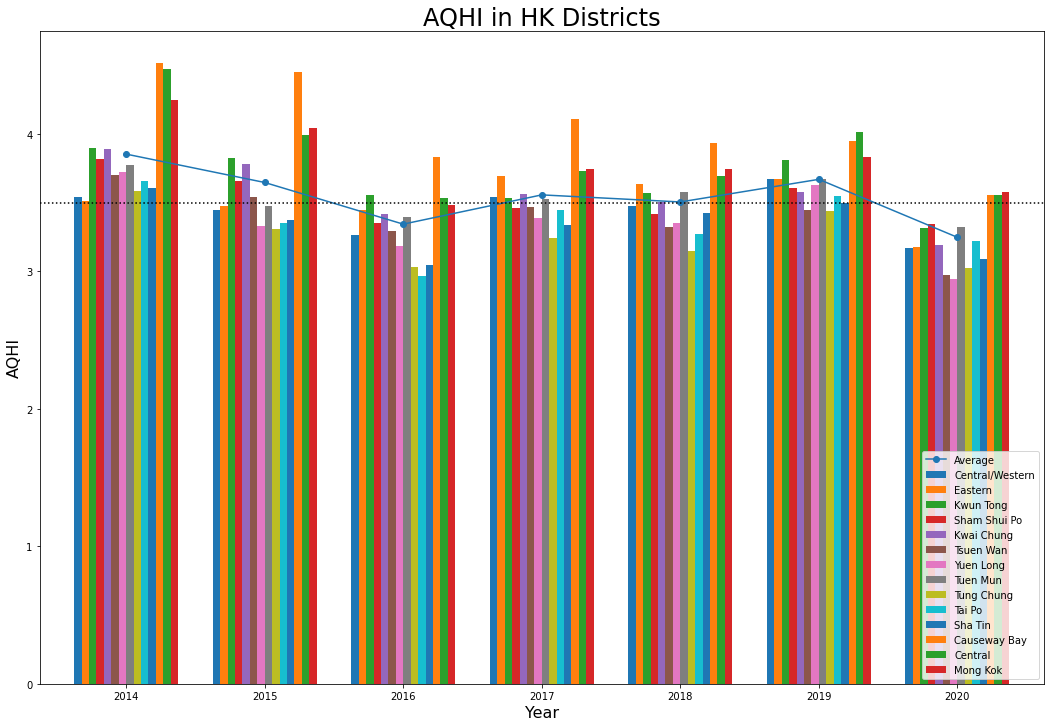

In [31]:
df.groupby(df['Date Period'].dt.strftime('%Y')).mean()[['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok']].plot(kind='bar',figsize=(18,12),width=0.75)

df.groupby(df['Date Period'].dt.strftime('%Y'))[['Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok']].mean().T.mean().plot(marker='o')

plt.legend(loc='lower right', labels=['Average','Central/Western', 'Eastern', 'Kwun Tong', 'Sham Shui Po', 'Kwai Chung',
       'Tsuen Wan', 'Yuen Long', 'Tuen Mun', 'Tung Chung', 'Tai Po', 'Sha Tin',
       'Causeway Bay', 'Central', 'Mong Kok'])


plt.title('AQHI in HK Districts',size=24)
plt.xlabel('Year',size=16)
plt.ylabel('AQHI',size=16)
plt.axhline(y=3.5, color='black',linestyle=':')


# Daily Pollution

In [38]:
daily = pd.read_csv(data_path+'/daily_max_pollution.csv',index_col=0)
daily.index = daily['Date']
daily.drop(['Hour','Date'],axis=1,inplace=True)
daily.shape

(2557, 14)

In [39]:
daily.head()

,Central/Western,Eastern,Kwun Tong,Sham Shui Po,Kwai Chung,Tsuen Wan,Yuen Long,Tuen Mun,Tung Chung,Tai Po,Sha Tin,Causeway Bay,Central,Mong Kok
Date,,,,,,,,,,,,,,
2014-01-01,8.0,7.0,9.0,8.0,7.0,7.0,7.0,8.0,7.0,6.0,7.0,10.0,8.0,9.0
2014-01-02,7.0,6.0,7.0,8.0,6.0,7.0,7.0,8.0,7.0,5.0,6.0,9.0,7.0,8.0
2014-01-03,9.0,9.0,11.0,11.0,11.0,11.0,11.0,10.0,10.0,10.0,11.0,11.0,11.0,11.0
2014-01-04,9.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,10.0,8.0,9.0,11.0,10.0,9.0
2014-01-05,8.0,8.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,7.0,9.0,9.0,9.0,9.0


In [42]:
daily['Max']=daily.max(axis=1)

In [44]:
daily = daily[['Max']]

In [45]:
daily.head()

,Max
Date,
2014-01-01,10.0
2014-01-02,9.0
2014-01-03,11.0
2014-01-04,11.0
2014-01-05,9.0


In [47]:
daily[daily['Max']>6].count()

Max    674
dtype: int64

In [48]:
daily.count()

Max    2557
dtype: int64

In [49]:
674/2557

0.26359014470082126